# Загрузка и обработка датасета

In [40]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('/kaggle/input/song-popularity/dataset.csv')

/kaggle/input/song-popularity/dataset (2).csv
/kaggle/input/song-popularity/dataset.csv


узаем подробнее о датасете

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Убираем строки с пустыми значениями

In [3]:
data = data.dropna()

Удаляем стобцы, которые не несут никакой важной информации

In [4]:
data.drop(columns=['Unnamed: 0', 'track_id'], inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

Описание столбцов

artists: Имя или имена исполнителя(ей) трека.

album_name: Название альбома, в котором присутствует трек.

track_name: Название трека или название песни.

popularity: Оценка популярности трека, обычно основанная на метриках прослушиваний.

duration_ms: Продолжительность трека в миллисекундах.

explicit: Указатель на наличие откровенного (нецензурного) контента; обычно представляется как "True" или "False".

danceability: Показатель от 0.0 до 1.0, описывающий, насколько трек подходит для танцев, основываясь на темпе, стабильности ритма, силе удара и т.д.

energy: Показатель от 0.0 до 1.0, отражающий интенсивность и активность трека.

key: Тональность трека, представленная в виде целого числа, соответствующего музыкальным нотам (0=До, 1=До#/Реb и т.д.).

loudness: Общая громкость трека в децибелах (дБ), где более высокие значения означают более громкие треки.

mode: Модальность трека, где 1 указывает на мажор, а 0 — на минор.

speechiness: Показатель от 0.0 до 1.0, показывающий наличие разговорных фрагментов, где более высокие значения обозначают более речеподобные треки.

acousticness: Показатель от 0.0 до 1.0, предсказывающий, является ли трек акустическим.

instrumentalness: Показатель от 0.0 до 1.0, оценивающий вероятность отсутствия вокала в треке.

liveness: Показатель от 0.0 до 1.0, указывающий на присутствие аудитории; более высокие значения предполагают запись с концерта.

valence: Показатель от 0.0 до 1.0, описывающий музыкальную позитивность трека (веселые, жизнерадостные звуки имеют более высокие значения).

tempo: Общий темп трека в ударах в минуту (BPM).

time_signature: Предполагаемая размерность трека (например, 4 соответствует размеру 4/4).

track_genre: Жанр или стилистическая категория, связанная с треком.

# Exploratory Data Analysis

Импорт библиотек

In [6]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Разделение столбцов, на содержущие численную или строчную(объектную) информацию

In [7]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
['artists', 'album_name', 'track_name', 'track_genre']


Узнаем распределение популярности песен

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


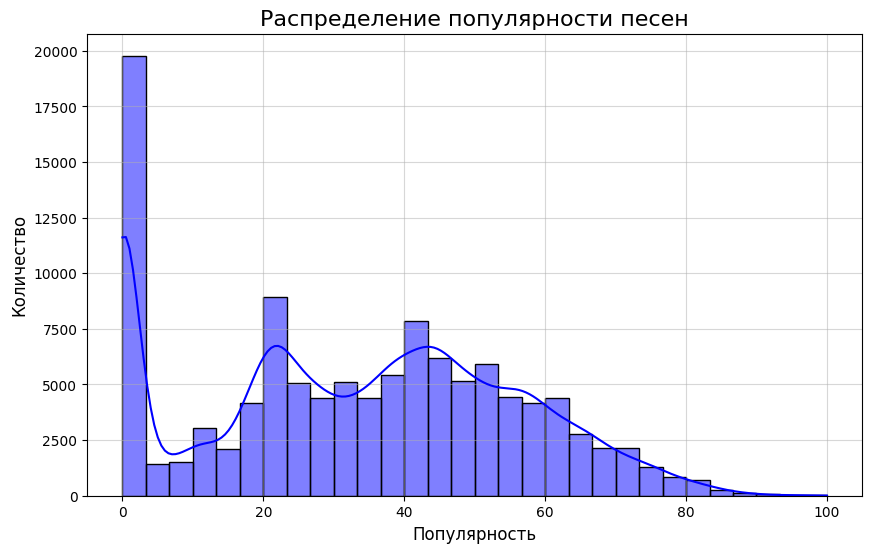

In [8]:
# Plot distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], kde=True, bins=30, color='blue')
plt.title("Распределение популярности песен", fontsize=16)
plt.xlabel("Популярность", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()



Большинство музыкальных треков остаются незамеченными, но также можно выделить категории популярности:

от 0 до 20 - низкая популярность.

от 20 до 60 - средняя популярность.

от 60 до 100 - высокая популярность. 

Теперь узнаем как распределены различные музыкальные характеристики

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


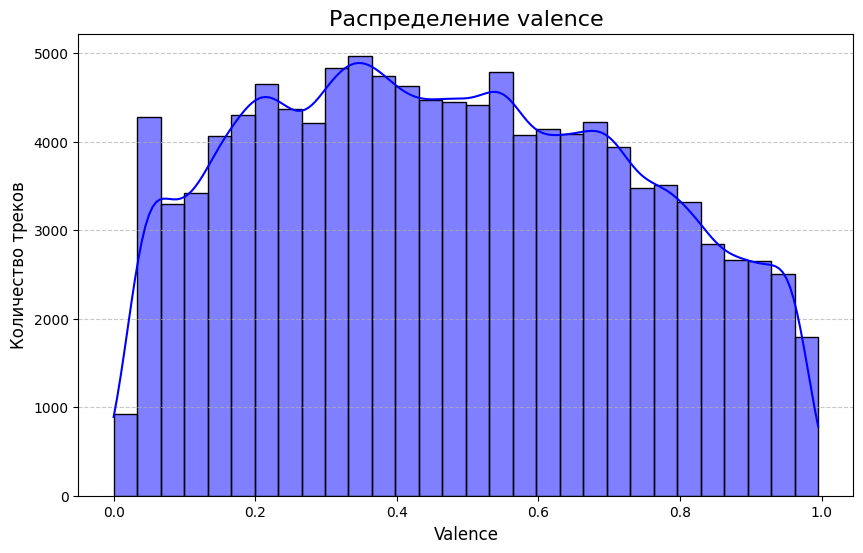

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


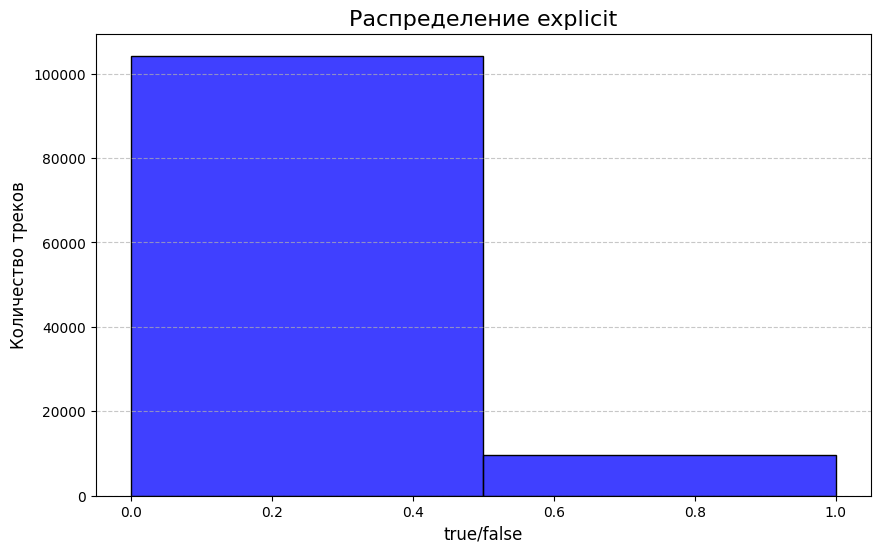

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


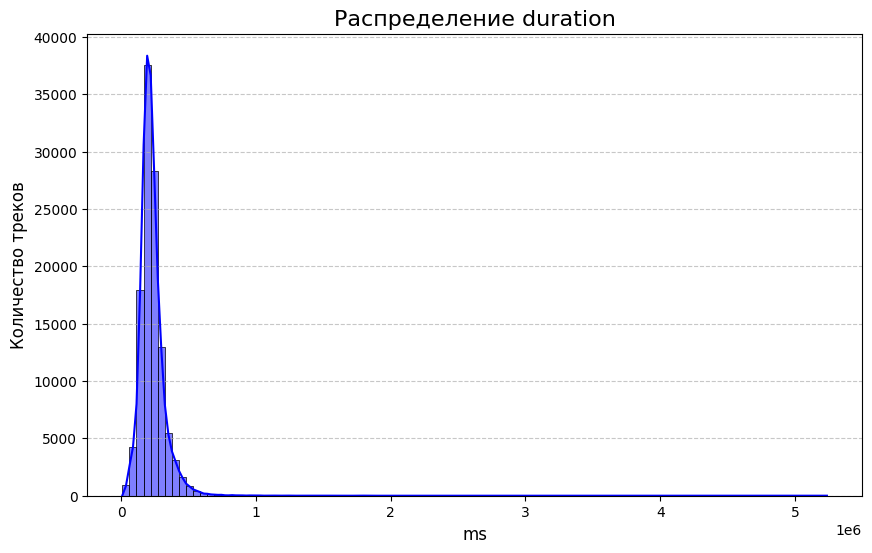

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


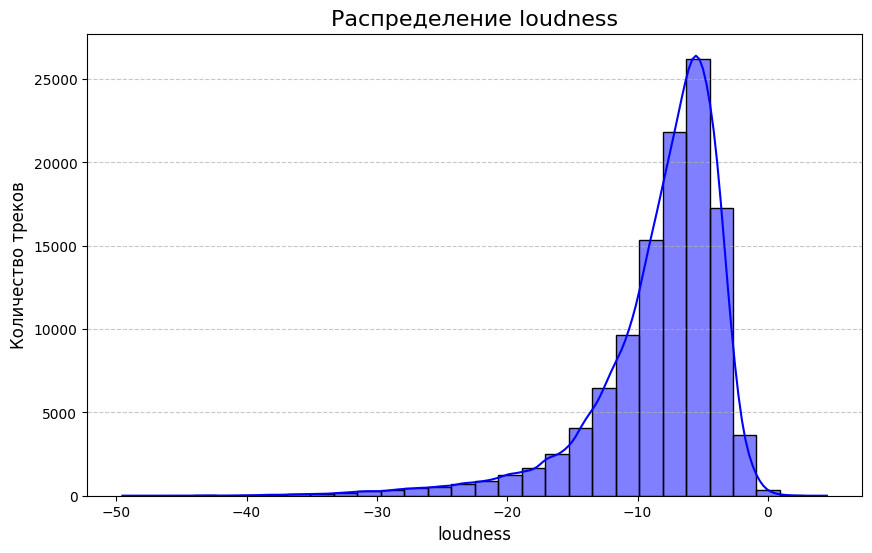

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


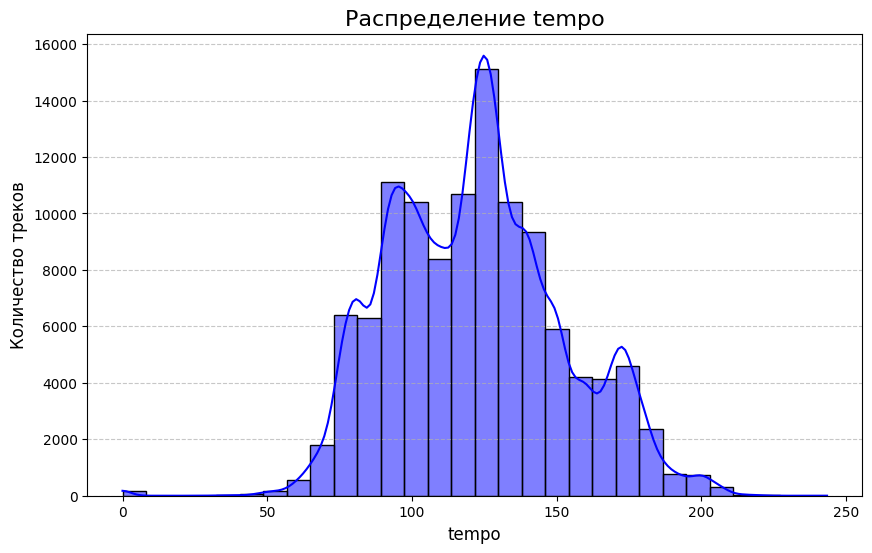

In [9]:
# Распределение различ. характеристик
plt.figure(figsize=(10, 6))
sns.histplot(data['valence'], bins=30, kde=True, color='blue')
plt.title("Распределение valence", fontsize=16)
plt.xlabel("Valence", fontsize=12)
plt.ylabel("Количество треков", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['explicit'], bins=2, kde=False, color='blue')
plt.title("Распределение explicit", fontsize=16)
plt.xlabel("true/false", fontsize=12)
plt.ylabel("Количество треков", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['duration_ms'], bins=100, kde=True, color='blue')
plt.title("Распределение duration", fontsize=16)
plt.xlabel("ms", fontsize=12)
plt.ylabel("Количество треков", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['loudness'], bins=30, kde=True, color='blue')
plt.title("Распределение loudness", fontsize=16)
plt.xlabel("loudness", fontsize=12)
plt.ylabel("Количество треков", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['tempo'], bins=30, kde=True, color='blue')
plt.title("Распределение tempo", fontsize=16)
plt.xlabel("tempo", fontsize=12)
plt.ylabel("Количество треков", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




**Ни одна из характеристик не особо близка к нормалному рапределению**

In [10]:
data[numerical_features]

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [11]:
data[categorical_features]

,artists,album_name,track_name,track_genre
0,Gen Hoshino,Comedy,Comedy,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,Chord Overstreet,Hold On,Hold On,acoustic
...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,world-music
113998,Michael W. Smith,Change Your World,Friends,world-music


Изучим признаки танцевальность и энергия

/tmp/ipykernel_24/2255376695.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  danceability_popularity = data.groupby('danceability_bin')['popularity'].mean().reset_index()
/tmp/ipykernel_24/2255376695.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  energy_popularity = data.groupby('energy_bin')['popularity'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default 

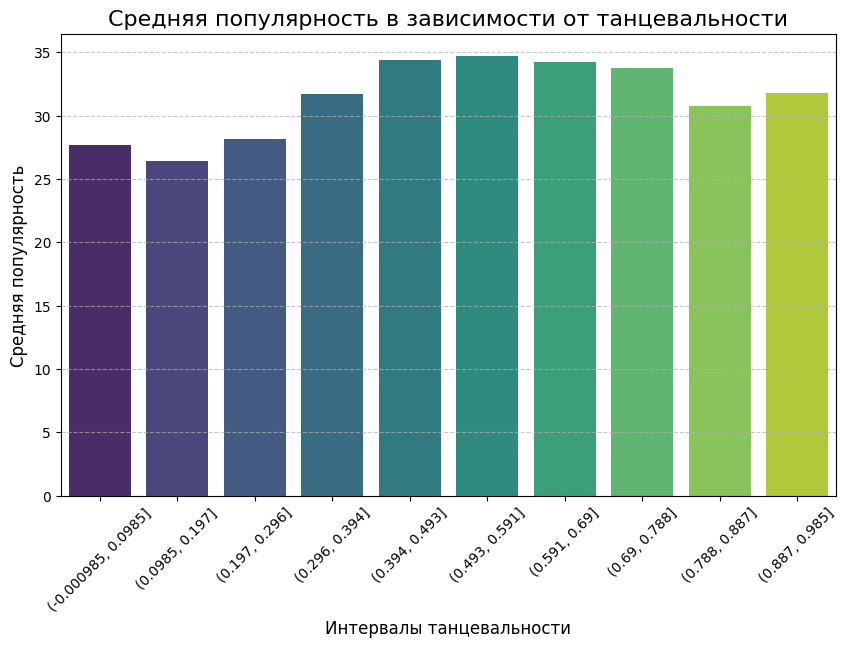

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


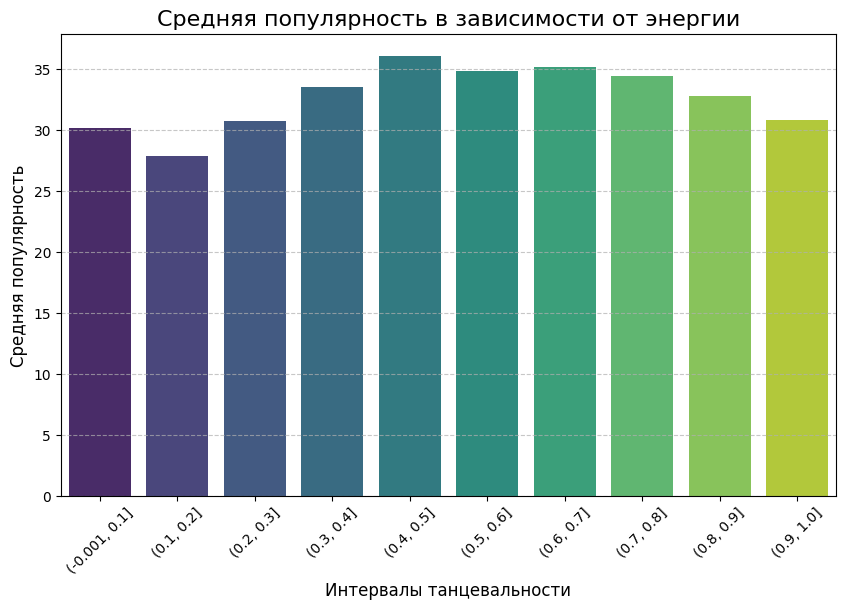

/tmp/ipykernel_24/2255376695.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(index=pd.cut(data['energy'], bins=10),


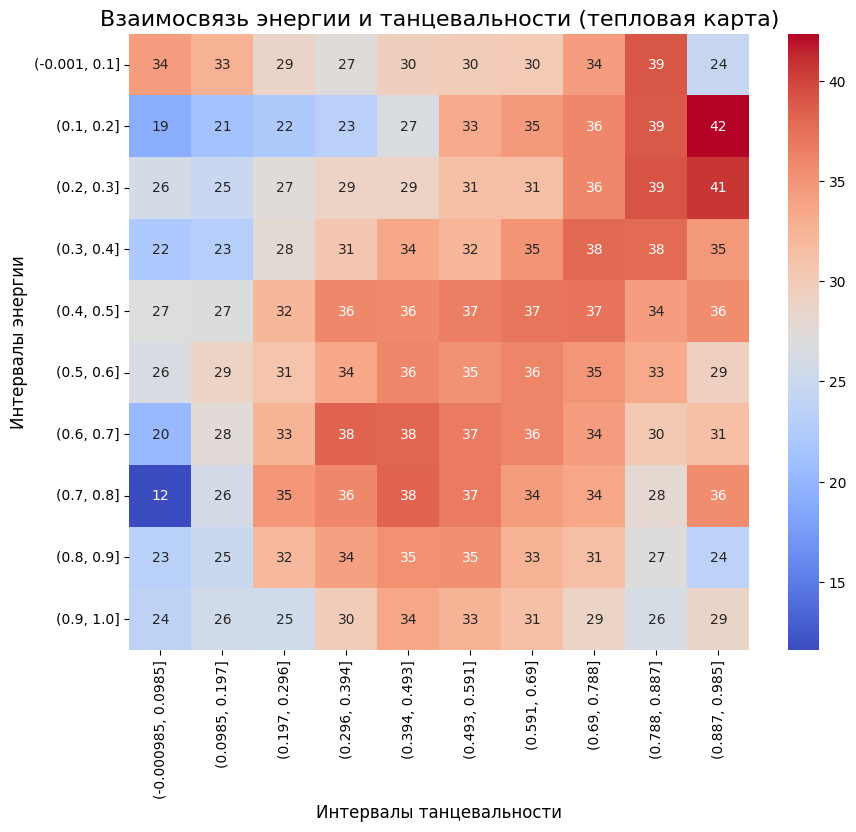

In [12]:
# Создаем интервалы для танцевальности
data['danceability_bin'] = pd.cut(data['danceability'], bins=10)
data['energy_bin'] = pd.cut(data['energy'], bins=10)


# Группировка по интервалам
danceability_popularity = data.groupby('danceability_bin')['popularity'].mean().reset_index()
energy_popularity = data.groupby('energy_bin')['popularity'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=danceability_popularity, x='danceability_bin', y='popularity', palette='viridis')
plt.title("Средняя популярность в зависимости от танцевальности", fontsize=16)
plt.xlabel("Интервалы танцевальности", fontsize=12)
plt.ylabel("Средняя популярность", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=energy_popularity, x='energy_bin', y='popularity', palette='viridis')
plt.title("Средняя популярность в зависимости от энергии", fontsize=16)
plt.xlabel("Интервалы танцевальности", fontsize=12)
plt.ylabel("Средняя популярность", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 8))
heatmap_data = data.pivot_table(index=pd.cut(data['energy'], bins=10), 
                                columns=pd.cut(data['danceability'], bins=10), 
                                values='popularity', 
                                aggfunc='mean')

sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title("Взаимосвязь энергии и танцевальности (тепловая карта)", fontsize=16)
plt.xlabel("Интервалы танцевальности", fontsize=12)
plt.ylabel("Интервалы энергии", fontsize=12)
plt.show()

наибольшую среднюю популярность мы можем наблюдать у треков со средними, средне-высокими значениями танцевальности и энергии

на хитмапе также можно заметить пиковое значение средней популярности у треков с небольшой энергией и болшим значением танцевальности,
следует узнать почему так

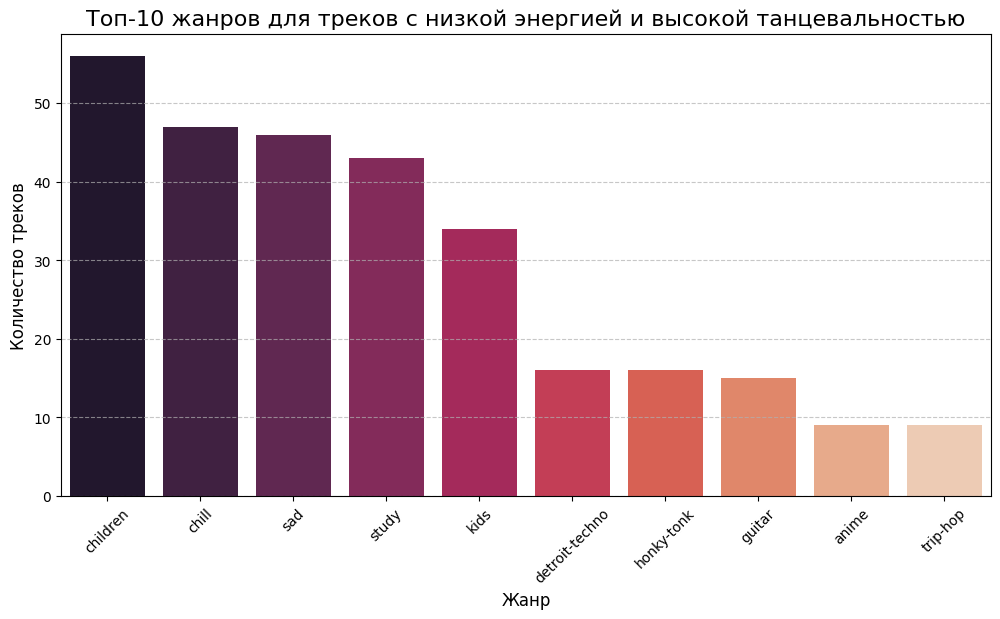

In [13]:
# Фильтрация треков по энергии и танцевальности
filtered_data = data[(data['danceability'] > 0.78) & ((data['energy'] < 0.3) & (data['energy'] > 0.1))]

# Топ-10 жанров для этой группы
top_genres_filtered = (
    filtered_data['track_genre']
    .value_counts()
    .head(10)
    .reset_index()
)

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_filtered, x='track_genre', y='count', palette='rocket')
plt.title("Топ-10 жанров для треков с низкой энергией и высокой танцевальностью", fontsize=16)
plt.xlabel("Жанр", fontsize=12)
plt.ylabel("Количество треков", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


как мы можем видеть топовые жанры в этом сегмете - это музыка для детей, спокойная, грустная музыка и музыка для учебы

**Можно сделать вывод, что** одними из ключевых факторами успеха являются - жанр песни и подходящие к нему характериски. 
Узнаем самые популярные жанры

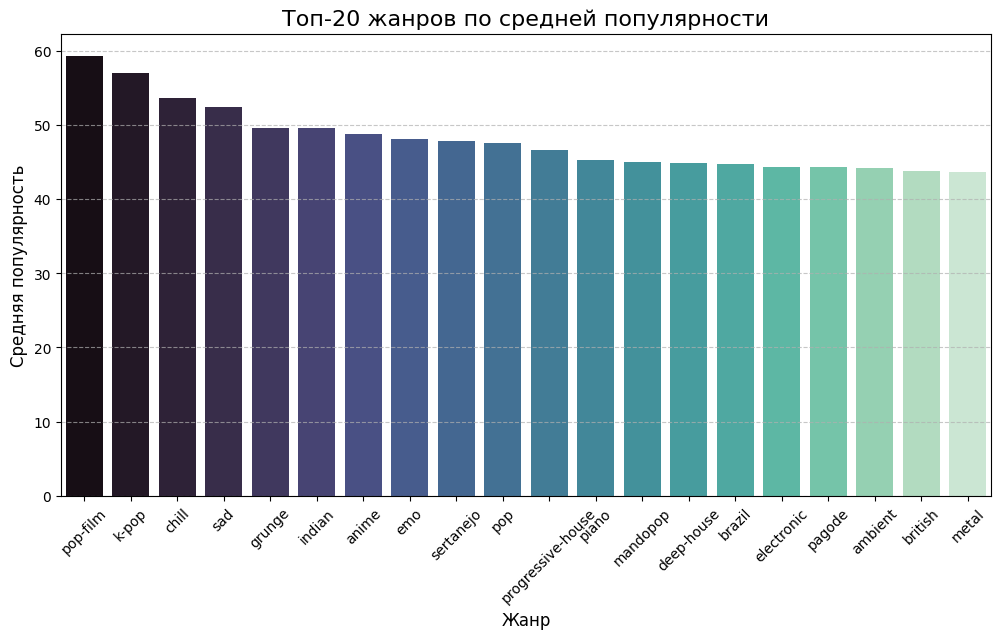

In [14]:
# Plot average popularity by genre
top_genres_popularity = (
    data.groupby('track_genre')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_popularity, x='track_genre', y='popularity', palette='mako')
plt.title("Топ-20 жанров по средней популярности", fontsize=16)
plt.xlabel("Жанр", fontsize=12)
plt.ylabel("Средняя популярность", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Измерим влияние, как я считаю, низначительных характеристик mod и key на популярность трека

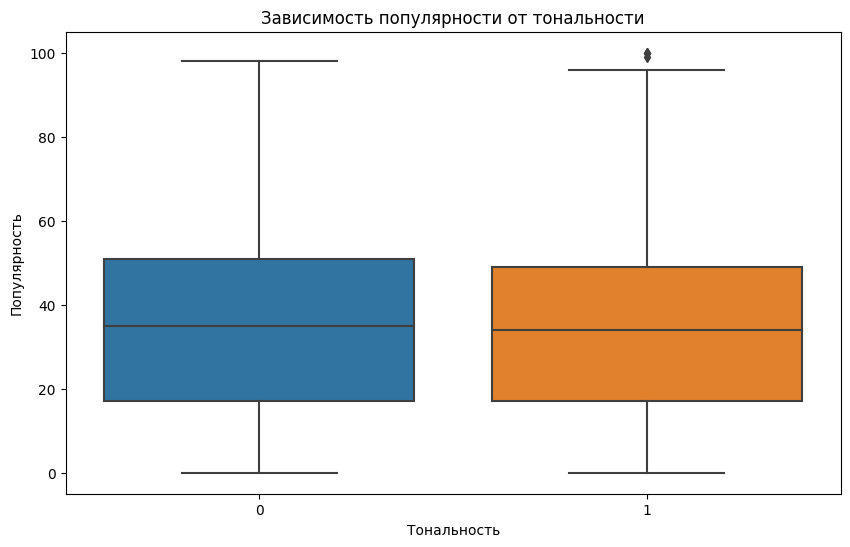

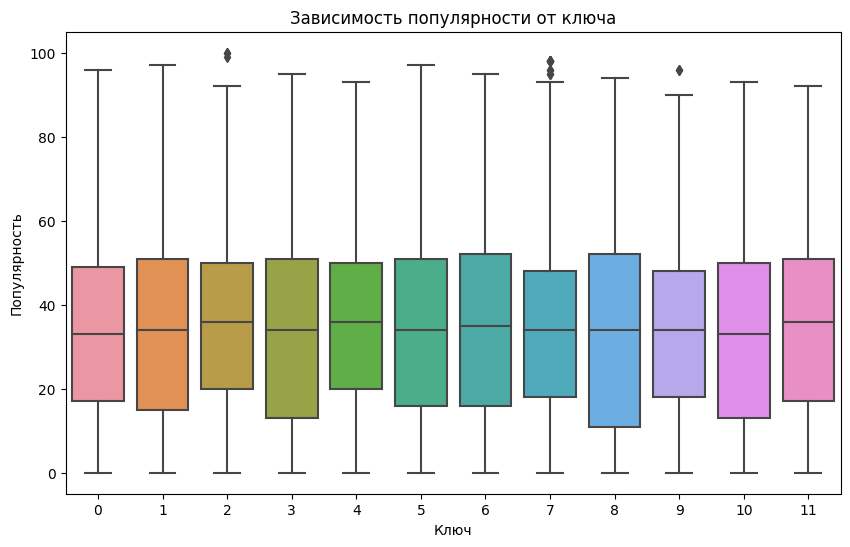

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="mode", y="popularity")
plt.title("Зависимость популярности от тональности")
plt.xlabel("Тональность")
plt.ylabel("Популярность")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="key", y="popularity")
plt.title("Зависимость популярности от ключа")
plt.xlabel("Ключ")
plt.ylabel("Популярность")
plt.show()

**Вывод:** Ключ и Тональность особо никак не влияют на популярность.

Изучим как громкость влияет на популярность

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


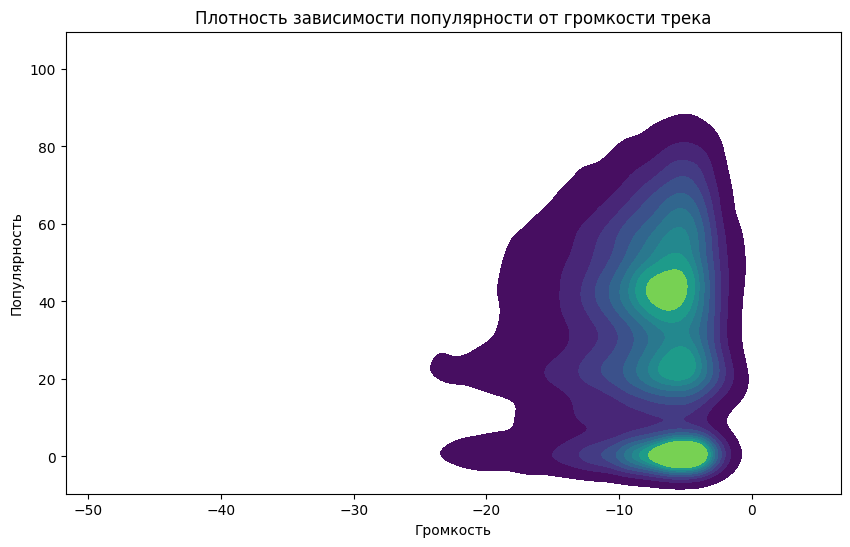

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x="loudness", y="popularity", cmap="viridis", fill=True)
plt.title("Плотность зависимости популярности от громкости трека")
plt.xlabel("Громкость")
plt.ylabel("Популярность")
plt.show()


**Вывод:** Слушатели не особо слушают тихие треки, популярными становятся средние и высокие по громкости.

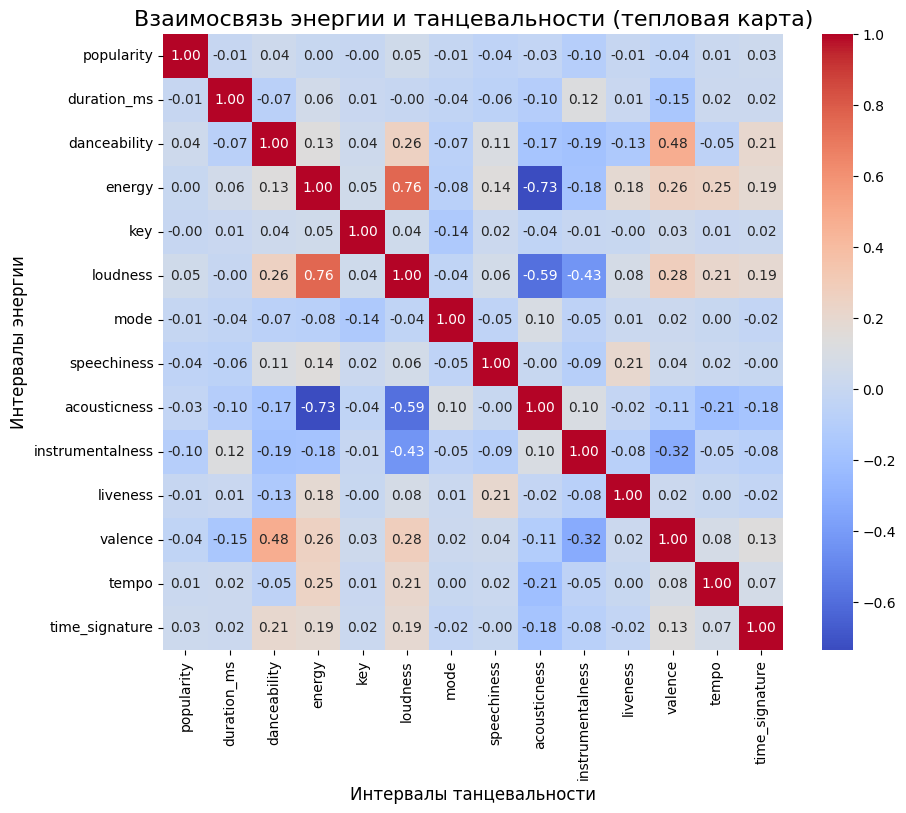

In [17]:
heatmap = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Взаимосвязь энергии и танцевальности (тепловая карта)", fontsize=16)
plt.xlabel("Интервалы танцевальности", fontsize=12)
plt.ylabel("Интервалы энергии", fontsize=12)
plt.show()


**По карте корреляций видно, что:**


• energy и loudness довольно сильно скоррелированны

• чем более акустичен трек, тем он менее энергичен

• переменных линейно-скоррелированных к значению популярности нет - это значит, что основные зависимости в датасете - нелинейны, значит нейронные сети должны хорошо справиться.


# Промежуточные выводы


• в датасете почти нет характеристик с нормальным распределением. 

• переменных линейно-скоррелированных к значению популярности нет 

• ключ и тональность особо никак не влияют на популярность.

• слушатели любят громкие и/или танцевальные треки

• одними из ключевых факторами успеха являются - жанр песни и подходящие к нему характериски.

# Feature Engineering

Ограничим те значения, что не имеют сами по себе ограничений, изменив их тип оценивания

Изменим признак длительности трека, разделив на 3 эшалона: 0 - 1.2 мин, 1.2 - 3 мин, 3 мин +

In [18]:
data['duration_new'] = pd.cut(data['duration_ms'], bins=[0, 80000, 180000, 9000000], labels=[0, 1, 2])

Изменим loudness разделив на 3 категории: менее -15, -15 - -8, -8 и более

In [19]:
data['loudness_new'] = pd.cut(data['loudness'], bins=[-1000, -15, -8, 100], labels=[0, 1, 2])

Удалим лишние, незначимые столбцы

In [20]:
data.drop(columns=['artists', 'album_name', 'track_name', 'key', 'mode', 'duration_ms', 'loudness', 'danceability_bin', 'energy_bin'], inplace = True)

In [21]:
data

,popularity,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_new,loudness_new
0,73,False,0.676,0.4610,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,2,2
1,55,False,0.420,0.1660,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1,0
2,57,False,0.438,0.3590,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2,1
3,71,False,0.266,0.0596,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,2,0
4,82,False,0.618,0.4430,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,False,0.172,0.2350,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,2,0
113996,22,False,0.174,0.1170,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,2,0
113997,22,False,0.629,0.3290,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,2,1
113998,41,False,0.587,0.5060,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,2,1


Исправление типов

In [22]:
from sklearn.preprocessing import LabelEncoder

for col in ['explicit', 'track_genre']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [23]:
data

,popularity,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_new,loudness_new
0,73,0,0.676,0.4610,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0,2,2
1,55,0,0.420,0.1660,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0,1,0
2,57,0,0.438,0.3590,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0,2,1
3,71,0,0.266,0.0596,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0,2,0
4,82,0,0.618,0.4430,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,0,0.172,0.2350,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113,2,0
113996,22,0,0.174,0.1170,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113,2,0
113997,22,0,0.629,0.3290,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113,2,1
113998,41,0,0.587,0.5060,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113,2,1


Корреляция новой таблицы

<Axes: >

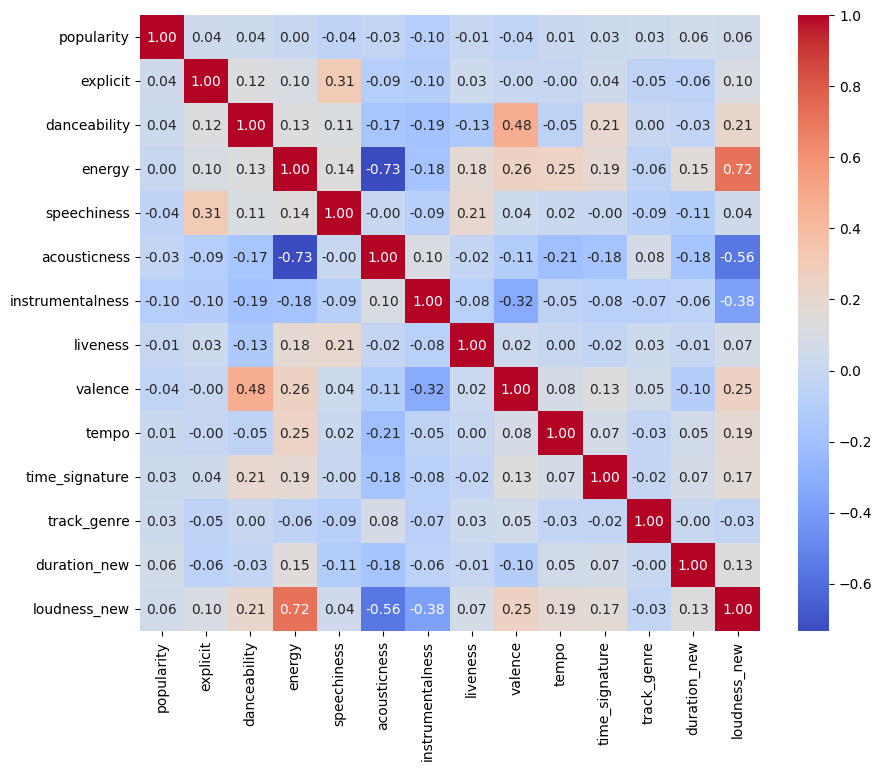

In [24]:
#Тепловая карта новых призанков
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2f')


новые признаки показывают примерно такую же корреляцию, что и до этого

# Обучение моделей

Определение метрик

MAE (Mean Absolute Error) — средняя абсолютная ошибка. Показывает среднее отклонение предсказаний от фактических значений.

MSE (Mean Squared Error) — среднеквадратическая ошибка. Возводит отклонения в квадрат, делая крупные ошибки более заметными.

RMSE (Root Mean Squared Error) — корень из среднеквадратической ошибки. Корень из MSE, возвращая ошибку к изначальной размерности.

R² (R-Squared) — коэффициент детерминации. Доля дисперсии, объяснённой моделью (чем ближе к 1, тем лучше).

Разделение данных на обучающую и тестовую выборки

In [25]:
X = data.drop(columns=['popularity'])
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    metrics = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    return metrics

# 1. Линейная модель

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

# Модель
linear_model = LinearRegression()

# Кросс-валидация
y_pred = cross_val_predict(linear_model, X_train, y_train, cv=5)

# Оценка
metrics_linear = evaluate_model(y_train, y_pred)
print('Линейная модель:', metrics_linear)

Линейная модель: {'MAE': 18.325154743154673, 'MSE': 483.98831392865895, 'RMSE': 21.999734405866334, 'R2': 0.027829993259862573}


MAE: допустимое отклонение .

RMSE: Высокое значение.


**Вывод:** не очень хороший результат с большим количеством ошибок

# 2. Дерево решений

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Модель
tree_model = DecisionTreeRegressor(random_state=42)

# Кросс-валидация
y_pred = cross_val_predict(tree_model, X_train, y_train, cv=5)

# Оценка
metrics_tree = evaluate_model(y_train, y_pred)
print('Дерево решений:', metrics_tree)

Дерево решений: {'MAE': 14.430108706394634, 'MSE': 516.3297571095412, 'RMSE': 22.722890597578935, 'R2': -0.037133106323939735}


MAE: Снизилось до 14.4 - улучшение

MSE и RMSE: Незначительные изменения

R²: Все еще далек от 1



**Вывод:** Дерево решений слегка лучше справляется с задачей, чем линейная модель,



# 3. Нейросеть

Создаем модель

In [35]:
# Создаем модель
from tensorflow.keras import regularizers

nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                      kernel_regularizer=regularizers.l2(0.2)),
    keras.layers.Dropout(0.45),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.2)),
    keras.layers.Dropout(0.45),
    keras.layers.Dense(1)
])

#  Компиляция модели
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Начинаем тренировать модель

In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.45, patience=7, min_lr=1e-6)
history = nn_model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    verbose=1,
    validation_split=0.2,
    validation_data=(X_train, y_train), 
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 748.7361 - mae: 21.9413 - val_loss: 495.1659 - val_mae: 18.2831 - learning_rate: 0.0010
Epoch 2/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 545.3179 - mae: 19.0708 - val_loss: 486.2978 - val_mae: 18.1982 - learning_rate: 0.0010
Epoch 3/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 536.0098 - mae: 18.9657 - val_loss: 484.6137 - val_mae: 18.1904 - learning_rate: 0.0010
Epoch 4/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 532.4589 - mae: 18.9818 - val_loss: 484.2704 - val_mae: 18.2397 - learning_rate: 0.0010
Epoch 5/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 526.3049 - mae: 18.8811 - val_loss: 481.9330 - val_mae: 18.2202 - learning_rate: 0.0010
Epoch 6/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 519.1559 - mae: 18.7904 - val_loss: 481.7527 - val_mae: 18.2171 - learning_rate: 0.0010
Epoch 7/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 515.5200 - mae: 18.7089 - val_loss: 4

Проанализируем полученные данные от нейронной сети

2850/2850 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Нейронная сеть: {'MAE': 17.99922228663123, 'MSE': 470.62359813320023, 'RMSE': 21.69386083972146, 'R2': 0.054675219623874116}


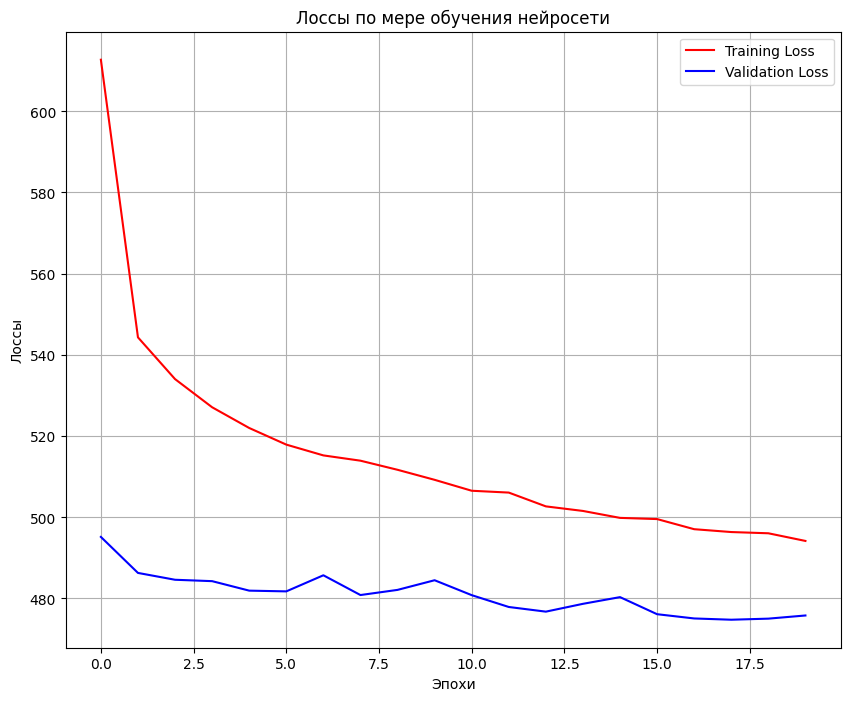

In [37]:
y_pred = nn_model.predict(X_train).flatten()

metrics_nn = evaluate_model(y_train, y_pred)
print('Нейронная сеть:', metrics_nn)

# Построение графика лосса
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Лоссы по мере обучения нейросети')
plt.xlabel('Эпохи')
plt.ylabel('Лоссы')
plt.legend()
plt.grid()
plt.show()

MAE: Средняя абсолютная ошибка 17.86 - не самый лучший результат

R²: Коэффициент детерминации 0.064 немного выше остальных, но все еще мало

RMSE: Высокая ошибка 

**Вывод:** Нейронная сеть не показала значительных улучшений по сравнению с другими моделями, нет каких-то серьезных изменений

# 4. XGBoost

In [38]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Создание модели XGBoost
xgboost_model = xgb.XGBRegressor(n_estimators=50, random_state=42)

# Кросс-валидация с 3 фолдами
y_pred = cross_val_predict(xgboost_model, X_train, y_train, cv=5)

# Оценка модели
metrics_xgboost = evaluate_model(y_train, y_pred)
print('XGboost:',metrics_xgboost)

XGboost: {'MAE': 13.642528993470421, 'MSE': 330.3614313510439, 'RMSE': 18.175847472705197, 'R2': 0.3364148147788406}


MAE: снизилось до 13.64 - неплохой результат

MSE: наименьшая критическая ошибка 330

R²: Коэффициент детерминации 0.33, что в 10 раз превышает результаты остальных моделей

RMSE: Минимальная ошибка 18.17 - это наименьшие отклонения в крупных ошибках по сравнению с остальными моделями.


**Вывод:** XGBoost демонстрирует наилучший результат, с наилучшими значениями по всем параметрам

Оценим важность различных признаков для XGBoost модели

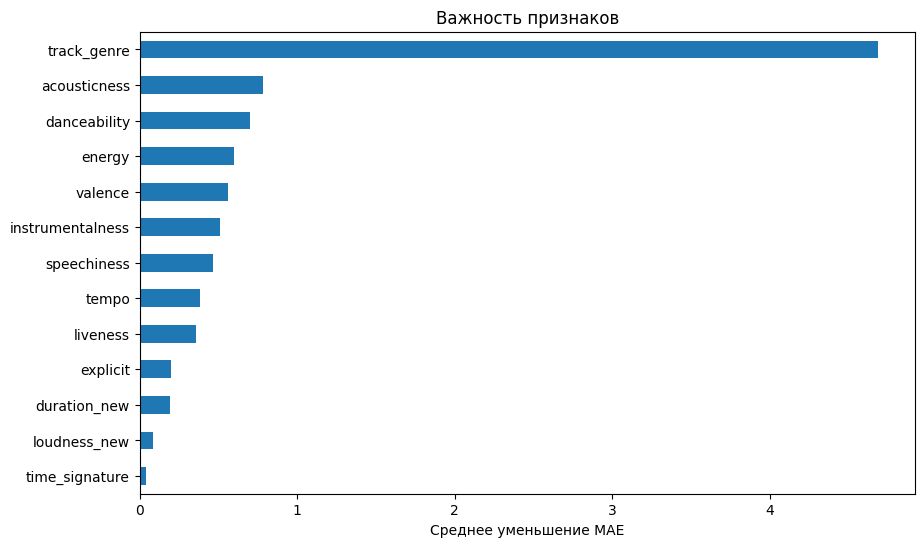

In [39]:
# Важность признаков с помощью permutation importance
xgboost_model.fit(X_train, y_train)
result = permutation_importance(xgboost_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')

importances = pd.Series(result.importances_mean, index=X.columns)



# Визуализация важности признаков

importances.sort_values().plot(kind='barh', figsize=(10,6))

plt.title('Важность признаков')

plt.xlabel('Среднее уменьшение MAE')

plt.show()

Как и было ранее замечено в аналитике, наиболее важный фактор - жанр трека.

на втором и третьем месте оказались  акустичность и танцевальность - как оказалось, самые важные музыкальные характеристики

# Заключение

Анализ показал, что на популярность трека влияют во многом жанровые особенности и такие факторы, как танцевальность, энергия и эмоции. 

Также важны такие параметры как acousticness и instrumentalness

Эти выводы могут быть использованы для создания рекомендаций для музыкантов и продюсеров и разработки рекомендационных систем, основанных на вкусах слушателей.

Тем не менее, популярность трека остаётся практически непредсказуемой, так как на неё воздействует множество разноплановых факторов, учесть которые полностью невозможно.